# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "GFDL-CM3"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/huss_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6034300327301025 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/huss_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.203287124633789 to load the data
*********Start to merge*********
It takes elapsed_time 1.2001121044158936 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_90x144_192x288_peri.nc
It takes elapsed_time 15.976417303085327 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.2006516456604 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6509225368499756 to mask the layer
*********Start to plot the layer*********


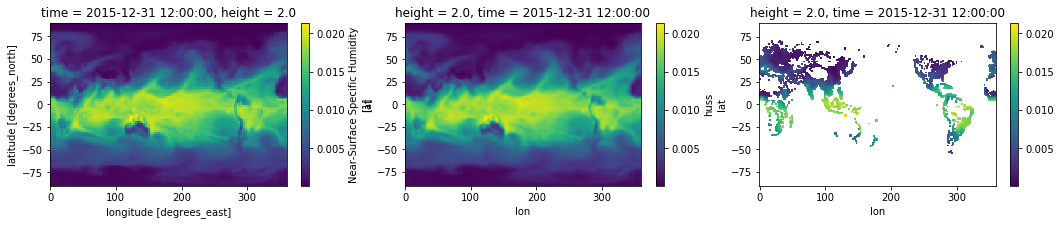

It takes elapsed_time 0.6992888450622559 to plot the layer
It takes elapsed_time 29.931770086288452 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/tas_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.622370719909668 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/tas_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.190053939819336 to load the data
*********Start to merge*********
It takes elapsed_time 1.2001051902770996 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027077674865722656 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.196282148361206 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6576371192932129 to mask the layer
*********Start to plot the layer*********


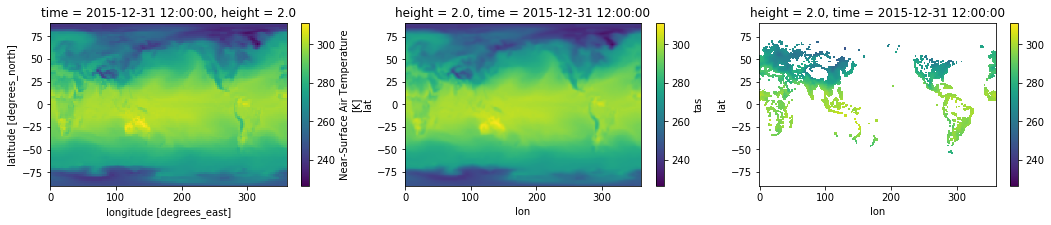

It takes elapsed_time 0.6598389148712158 to plot the layer
It takes elapsed_time 13.931640863418579 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/uas_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5947957038879395 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/uas_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.229017734527588 to load the data
*********Start to merge*********
It takes elapsed_time 1.2122101783752441 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02657008171081543 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.195645093917847 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6516573429107666 to mask the layer
*********Start to plot the layer*********


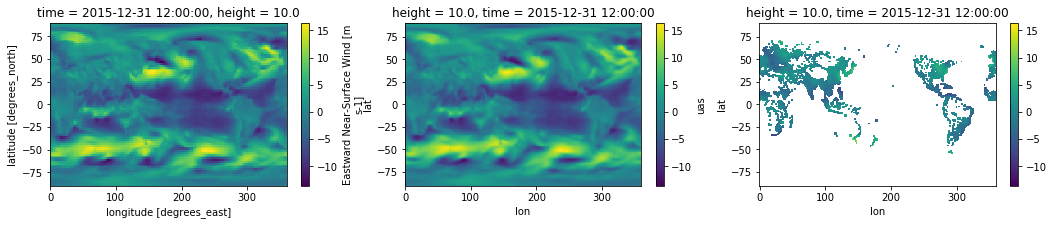

It takes elapsed_time 0.6852471828460693 to plot the layer
It takes elapsed_time 14.001194715499878 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/vas_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6294441223144531 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/vas_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.3096015453338623 to load the data
*********Start to merge*********
It takes elapsed_time 1.204228162765503 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026237010955810547 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.195332050323486 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6595005989074707 to mask the layer
*********Start to plot the layer*********


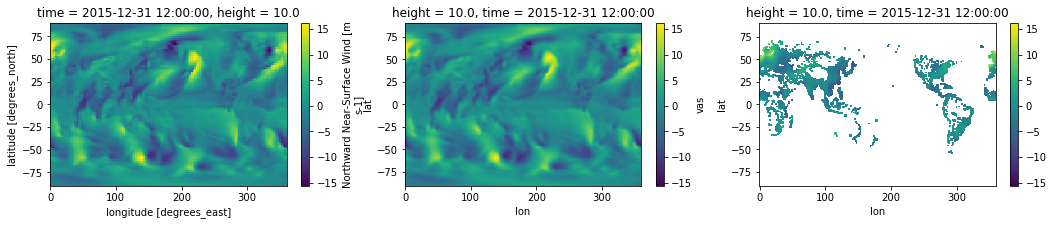

It takes elapsed_time 0.697335958480835 to plot the layer
It takes elapsed_time 14.093225002288818 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/pr_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6369225978851318 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/pr_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2511365413665771 to load the data
*********Start to merge*********
It takes elapsed_time 1.2396163940429688 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026373624801635742 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.223703622817993 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.652411937713623 to mask the layer
*********Start to plot the layer*********


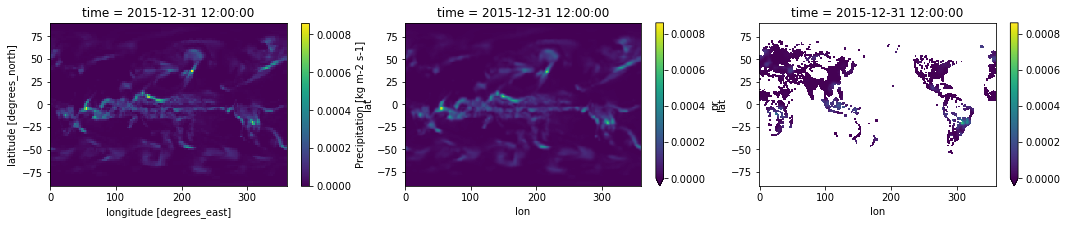

It takes elapsed_time 0.65535569190979 to plot the layer
It takes elapsed_time 14.049423456192017 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/prsn_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6208398342132568 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/prsn_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.164046287536621 to load the data
*********Start to merge*********
It takes elapsed_time 1.2144479751586914 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026462078094482422 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.214940309524536 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6534326076507568 to mask the layer
*********Start to plot the layer*********


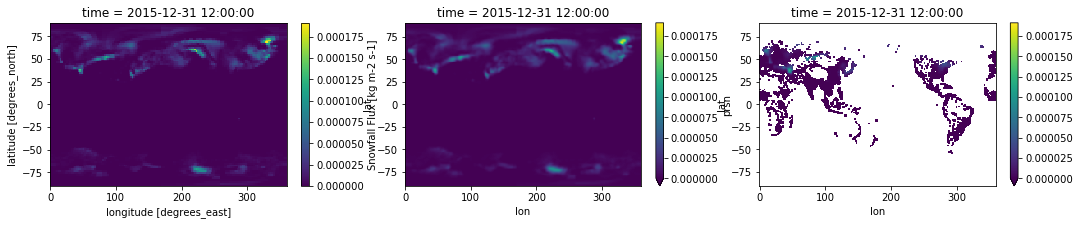

It takes elapsed_time 0.6715872287750244 to plot the layer
It takes elapsed_time 13.94582748413086 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlds_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6006650924682617 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlds_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.4418692588806152 to load the data
*********Start to merge*********
It takes elapsed_time 1.2078006267547607 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.0284426212310791 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.27024531364441 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6547403335571289 to mask the layer
*********Start to plot the layer*********


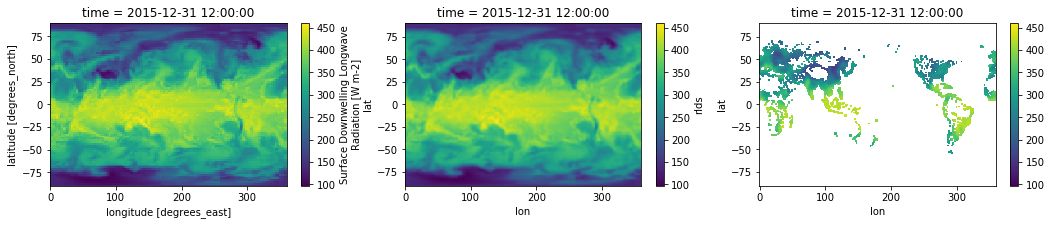

It takes elapsed_time 0.7045750617980957 to plot the layer
It takes elapsed_time 14.30832052230835 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlus_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.590155839920044 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlus_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2567973136901855 to load the data
*********Start to merge*********
It takes elapsed_time 1.2150111198425293 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026334285736083984 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.25700068473816 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6539862155914307 to mask the layer
*********Start to plot the layer*********


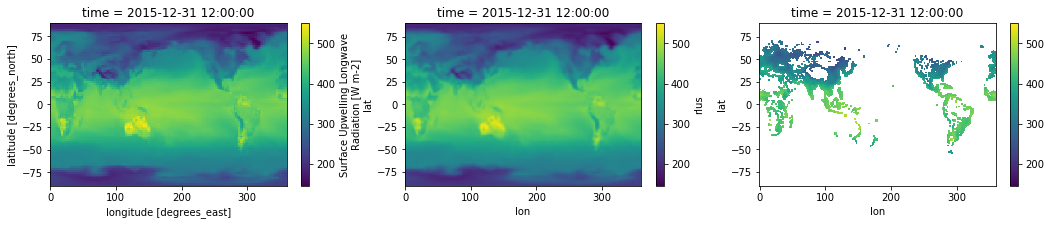

It takes elapsed_time 0.6547794342041016 to plot the layer
It takes elapsed_time 14.064552068710327 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsds_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6437375545501709 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsds_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.262230634689331 to load the data
*********Start to merge*********
It takes elapsed_time 1.2424075603485107 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.047651052474975586 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.276020526885986 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.653348445892334 to mask the layer
*********Start to plot the layer*********


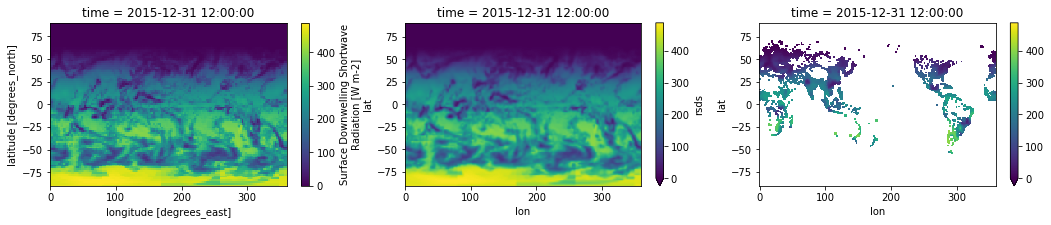

It takes elapsed_time 0.671875 to plot the layer
It takes elapsed_time 14.154183149337769 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsus_day_GFDL-CM3_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6146426200866699 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsus_day_GFDL-CM3_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2128348350524902 to load the data
*********Start to merge*********
It takes elapsed_time 1.1930205821990967 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02663111686706543 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.256330490112305 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6531844139099121 to mask the layer
*********Start to plot the layer*********


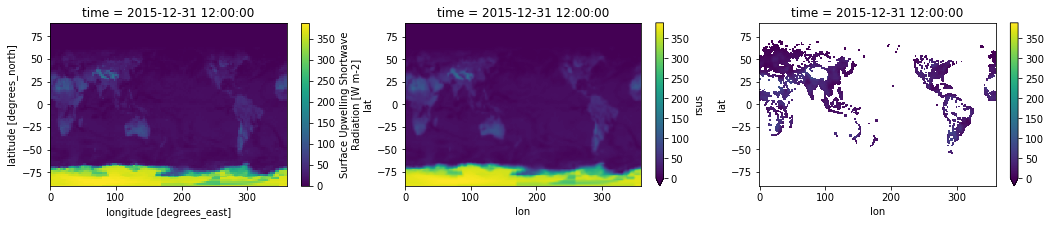

It takes elapsed_time 0.6803264617919922 to plot the layer
It takes elapsed_time 14.023231029510498 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 5)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.46839189529419 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

260.7813124656677


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/huss_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5802209377288818 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/huss_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2819254398345947 to load the data
*********Start to merge*********
It takes elapsed_time 1.2059292793273926 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.10492873191833496 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.234847068786621 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6638584136962891 to mask the layer
*********Start to plot the layer*********


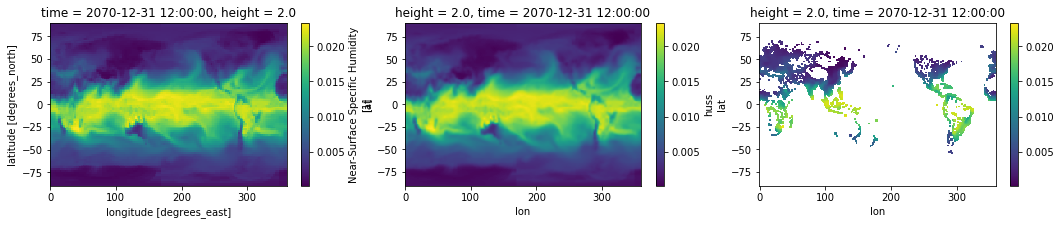

It takes elapsed_time 0.6640465259552002 to plot the layer
It takes elapsed_time 14.15651535987854 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/tas_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6082978248596191 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/tas_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.150010347366333 to load the data
*********Start to merge*********
It takes elapsed_time 1.2094223499298096 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.0275728702545166 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.28302788734436 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6549272537231445 to mask the layer
*********Start to plot the layer*********


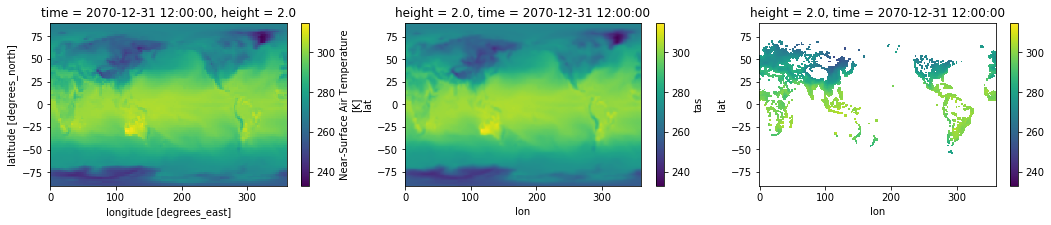

It takes elapsed_time 0.6624226570129395 to plot the layer
It takes elapsed_time 13.988040924072266 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/uas_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6421833038330078 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/uas_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.5488989353179932 to load the data
*********Start to merge*********
It takes elapsed_time 1.207763433456421 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026580095291137695 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.248787641525269 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6536867618560791 to mask the layer
*********Start to plot the layer*********


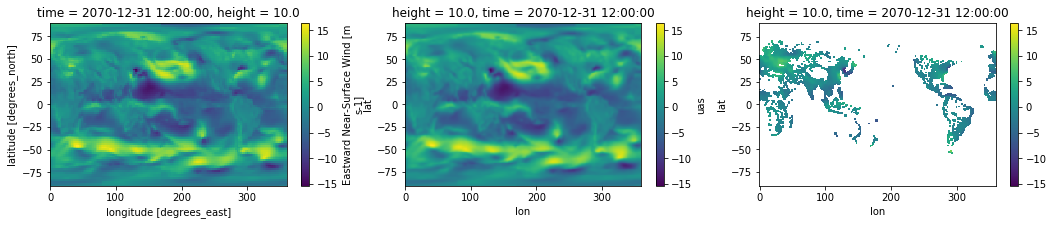

It takes elapsed_time 0.69895339012146 to plot the layer
It takes elapsed_time 14.385648250579834 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/vas_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5935511589050293 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/vas_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.155113697052002 to load the data
*********Start to merge*********
It takes elapsed_time 1.257324457168579 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027530908584594727 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.259191989898682 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6513774394989014 to mask the layer
*********Start to plot the layer*********


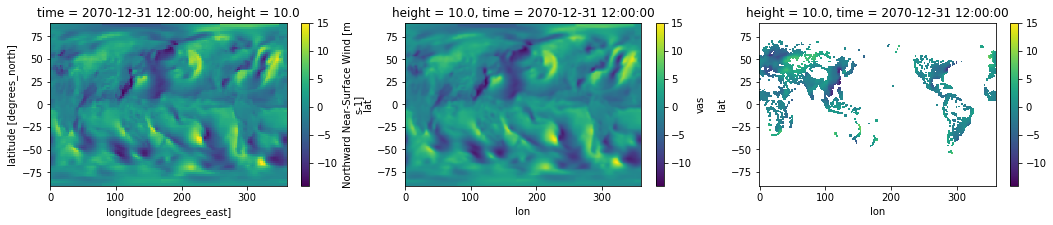

It takes elapsed_time 0.6839978694915771 to plot the layer
It takes elapsed_time 14.035411357879639 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/pr_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6034245491027832 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/pr_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.1730499267578125 to load the data
*********Start to merge*********
It takes elapsed_time 1.2107648849487305 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02636885643005371 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.244356870651245 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.65254807472229 to mask the layer
*********Start to plot the layer*********


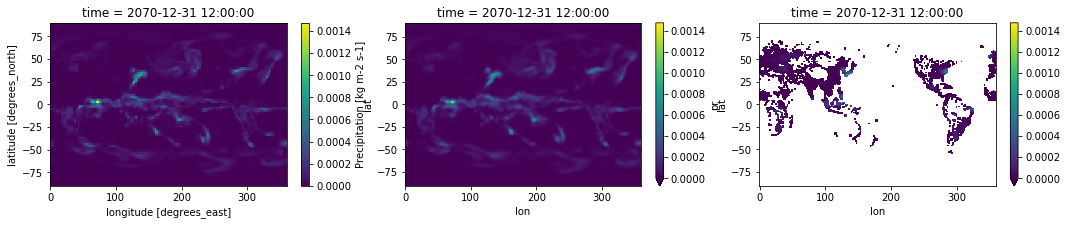

It takes elapsed_time 0.6738429069519043 to plot the layer
It takes elapsed_time 13.981839895248413 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/prsn_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5916826725006104 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/prsn_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.25053071975708 to load the data
*********Start to merge*********
It takes elapsed_time 1.2324168682098389 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026496410369873047 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.248579978942871 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6529123783111572 to mask the layer
*********Start to plot the layer*********


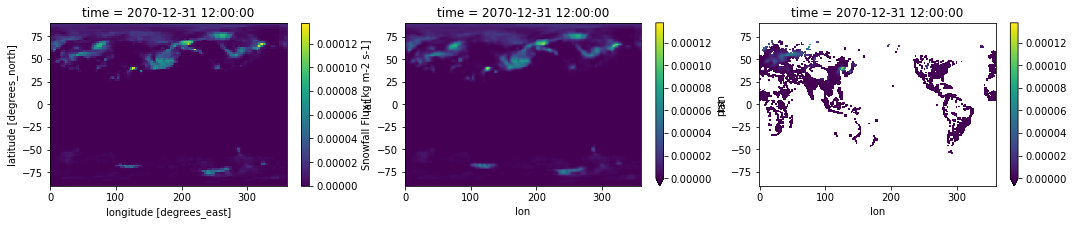

It takes elapsed_time 0.654320240020752 to plot the layer
It takes elapsed_time 14.066104173660278 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlds_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5600934028625488 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlds_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.147202491760254 to load the data
*********Start to merge*********
It takes elapsed_time 1.229095458984375 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026454687118530273 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.23694658279419 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.651386022567749 to mask the layer
*********Start to plot the layer*********


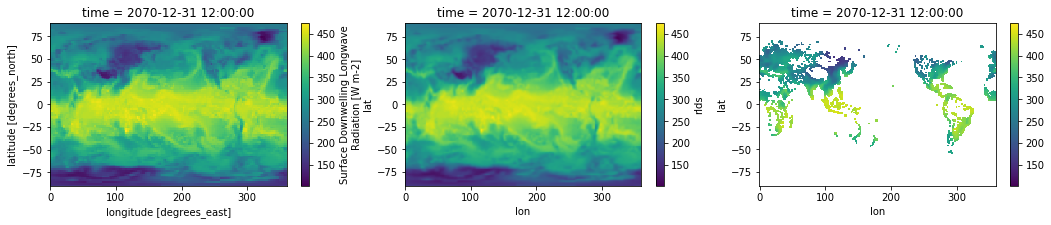

It takes elapsed_time 0.6878228187561035 to plot the layer
It takes elapsed_time 13.979780912399292 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlus_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5667388439178467 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rlus_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.1790196895599365 to load the data
*********Start to merge*********
It takes elapsed_time 1.2251956462860107 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026580333709716797 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.248759269714355 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6534922122955322 to mask the layer
*********Start to plot the layer*********


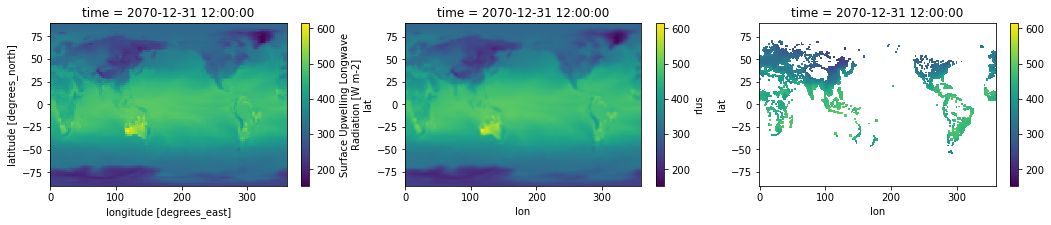

It takes elapsed_time 0.6586642265319824 to plot the layer
It takes elapsed_time 13.99237060546875 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsds_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5805225372314453 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsds_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.1925618648529053 to load the data
*********Start to merge*********
It takes elapsed_time 1.2178561687469482 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02677178382873535 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.2410147190094 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6533429622650146 to mask the layer
*********Start to plot the layer*********


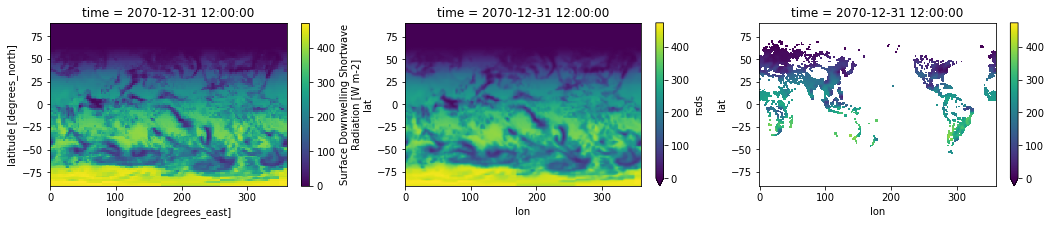

It takes elapsed_time 0.660346508026123 to plot the layer
It takes elapsed_time 13.992772579193115 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsus_day_GFDL-CM3_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5933551788330078 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-CM3/rsus_day_GFDL-CM3_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.226271390914917 to load the data
*********Start to merge*********
It takes elapsed_time 1.2176575660705566 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026546716690063477 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.259525775909424 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6540403366088867 to mask the layer
*********Start to plot the layer*********


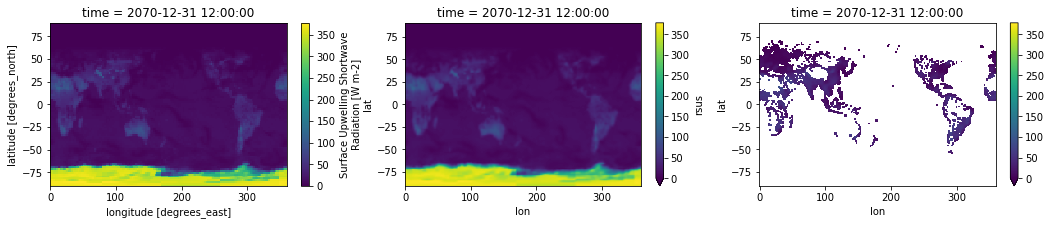

It takes elapsed_time 0.6749453544616699 to plot the layer
It takes elapsed_time 14.059840202331543 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2061, 2071, 5)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 28.234588146209717 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

259.7707533836365
